# **Создание модели на основе данных о качестве воздуха**

В этом проекте наша команда будет исследовать набор данных о качестве воздуха, чтобы обучить модель машинного обучения (ML), способную предсказывать концентрацию угарного газа в воздухе на основе концентрации различных загрязнителей, таких как металлические оксиды и углеводороды. Это также даст нам возможность работать с временными рядами.

Данные были получены из репозитория машинного обучения UCI здесь [UCI Machine Learning Repository - Air Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Air+Quality). Этот набор данных охватывает данные датчиков по различным загрязнителям, собранные с марта 2004 года по февраль 2005 года (1 год).

# **О наборе данных**

Этот набор данных содержит ответы устройства многосенсорного газового детектора, размещенного на местности в итальянском городе. В нем записаны средние почасовые показания вместе с эталонными концентрациями газов, полученными с помощью сертифицированного анализатора. Данные взяты из репозитория машинного обучения UCI: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

Набор данных содержит 9357 экземпляров почасовых усредненных ответов от массива из 5 химических сенсоров на основе металлических оксидов, встроенных в многосенсорное устройство контроля качества воздуха. Устройство было расположено на местности в значительно загрязненной области, на уровне дороги, в итальянском городе. Данные записывались с марта 2004 года по февраль 2005 года (один год), представляя самую длительную бесплатно доступную запись ответов устройств детектирования качества воздуха на местности. Почасовые усредненные концентрации для CO, неметановых углеводородов, бензола, общих оксидов азота ($NO_x$) и диоксида азота ($NO_2$) были предоставлены совместно расположенным эталонным сертифицированным анализатором. Присутствуют доказательства перекрестных чувствительностей, а также концептуальных и сенсорных сдвигов, как описано в работе Де Вито и др., Sens. And Act. B, Vol. 129,2,2008 (требуется цитирование), в конечном итоге влияющих на способности оценки концентраций сенсорами. Отсутствующие значения помечены значением -200. Этот набор данных может использоваться исключительно в исследовательских целях. Коммерческое использование полностью исключено.

## **Открытие данных и изучение общей информации**

In [1]:
# импортируем необходимые библиотеки для работы с данными
import pandas as pd
import numpy as np
import datetime

# для работы с визуализациями
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# считываем csv-файл датасета в переменную data с использованием разделителей '\'
df = pd.read_csv('../data/AirQuality.csv', sep=';')

In [3]:
# рассмотрим данные датасета (первые и последние 20 строчек)
display(df.head(20))
display(df.tail(20))

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# посмотрим основную информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


**Описание данных**

- 0 `Date` - дата (ДД/ММ/ГГГГ)
- 1 `Time` - время (ЧЧ.ММ.СС)
- 2 `CO(GT)` - истинная почасовая усредненная концентрация CO в $мг/м^3$ (эталонный анализатор)
- 3 `PT08.S1(CO)` - почасовой усредненный отклик сенсора (номинально нацеленный на CO)
- 4 `NMHC(GT)` - истинная почасовая усредненная общая концентрация неметановых углеводородов в $микрог/м^3$ (эталонный анализатор)
- 5 `C6H6(GT)` - истинная почасовая усредненная концентрация бензола в $микрог/м^3$ (эталонный анализатор)
- 6 `PT08.S2(NMHC)` - почасовой усредненный отклик сенсора (номинально нацеленный на NMHC)
- 7 `NOx(GT)` - истинная почасовая усредненная концентрация $NO_x$ в ппб (эталонный анализатор)
- 8 `PT08.S3(NOx)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_x$)
- 9 `NO2(GT)` - истинная почасовая усредненная концентрация $NO_2$ в $микрог/м^3$ (эталонный анализатор)
- 10 `PT08.S4(NO2)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_2$)
- 11 `PT08.S5(O3)` - почасовой усредненный отклик сенсора (номинально нацеленный на $O_3$)
- 12 `T` - температура в °C
- 13 `RH` - относительная влажность (%)
- 14 `AH` - абсолютная влажность

**По первоночальному ознакомлению с датасетом можно сказать следующее:**
- в датасете 17 столбцов с количеством строк - 9471
- в датасете присутствуют пропуски со значением `NaN` хотя в информации о датасете пропусков нет
- столбцы со временем и датой лучше объединить и преобразовать в формат `datetime`
- необходимо удалить столбцы `Unnamed: 15` и `Unnamed: 16`
- столбцах `CO(GT)`, `C6H6(GT)`, `T`, `RH`, `AH` необходимо поменять формат данных на float64

## **Предобработка данных**

Сначала удалим столбцы `Unnamed: 15` и `Unnamed: 16`

In [5]:
# удалим ненужные столбцы из датасета
df.drop(['Unnamed: 15','Unnamed: 16'], axis=1, inplace=True, errors = 'ignore') 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


Преобразуем столбцы `CO(GT)`, `C6H6(GT)`, `T`, `RH`, `AH` в формат float, при этом поменяем все запятые на точки, чтобы значения не исчезли

In [6]:
# преобразуем столбцы в формат float64
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    df[col] = df[col].str.replace(',', '.').astype(float)

Теперь поработаем над скрытыми пропусками. Из документации нам известно, что при значении `-200` замера не осуществлялось. Заменим эти значения на NaN

In [7]:
# Заменим значения -200 на NaN
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Похоже, что в столбце `NMHC(GT)` много некорректных показаний по сравнению со всеми другими датчиками. Посмотрим какой процент составляют нулевые значения относительно общего числа значений и решим стоит ли сохранять этот столбец или удалить его.

<AxesSubplot: title={'center': 'Распределение пропусков в данных'}>

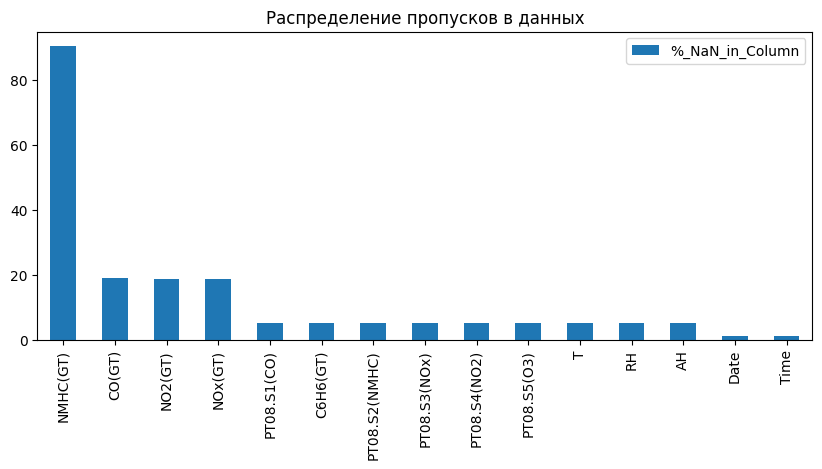

In [8]:
# создадим необходимые списки
percent_NaN = []
columns = df.columns
# создадим цикл определяющий процент пустых значений в столбцах
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100
    percent_NaN.append(pNaN)
    
nan_percent_df = pd.DataFrame(
    percent_NaN,
    index=columns,
    columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False
)

# посмотрим на полученные доли пустых значений в столбцах на столбчатой диаграмме
#nan_percent_df
nan_percent_df.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

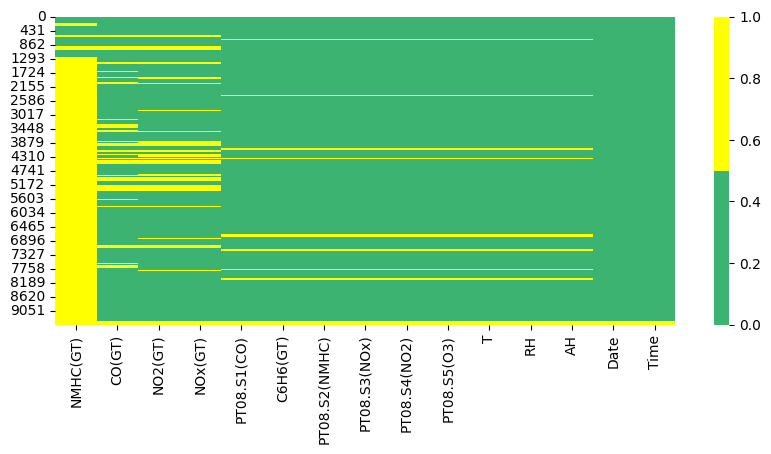

In [9]:
# Тепловая карта пропусков
colors = ['mediumseagreen', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = nan_percent_df.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

Как видим количество пустых значений в столбце `NMHC(GT)` более 90%. Его можно удалить. Также видим, что столбцы от `PT08.S1(CO)` до `AH`, связаны. Удалим все строки с пустыми значениями и продолжим предобработку датасета.

In [10]:
# удалим столбец NMHC(GT)
df.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore') 
# удалим пропуски из датасета
df = df.dropna()

# проверка удаления
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
# посмотрим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


Осталось почти 7 тыс строк. Этого должно хватить для анализа и создания модели

Столбцы со временем и датой объединим и преобразуем в формат `datetime`

In [12]:
# создадим новый столбец со временем и датой
df['DateTime'] =  (df['Date']) + ' ' + (df['Time'])
# преобразуем его в формат datetime
df['DateTime'] = df['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00


Теперь создадим столбцы даты, дня недели, месяца и часа (ну вдруг понадобятся) и удалим столбец `Time`

In [13]:
# создадим новые столбцы
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month']   = df['DateTime'].dt.month_name()
df['Hour']    = df['DateTime'].dt.hour
# изменим формат столбца Date
df['Date']    = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# удалим столбец Time
df.drop('Time', axis=1, inplace=True, errors = 'ignore') 
# посмотрим начало датасета
df.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Weekday,Month,Hour
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,Wednesday,March,18
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,Wednesday,March,19
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,Wednesday,March,20
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,Wednesday,March,21
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,Wednesday,March,22


Изменим порядок столбцов для удобства

In [14]:
# изменим порядок столбцов
df = df[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
# посмотрим начало датасета
df.head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [15]:
# посмотрим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Month          6941 non-null   object        
 2   Weekday        6941 non-null   object        
 3   DateTime       6941 non-null   datetime64[ns]
 4   Hour           6941 non-null   int64         
 5   CO(GT)         6941 non-null   float64       
 6   PT08.S1(CO)    6941 non-null   float64       
 7   C6H6(GT)       6941 non-null   float64       
 8   PT08.S2(NMHC)  6941 non-null   float64       
 9   NOx(GT)        6941 non-null   float64       
 10  PT08.S3(NOx)   6941 non-null   float64       
 11  NO2(GT)        6941 non-null   float64       
 12  PT08.S4(NO2)   6941 non-null   float64       
 13  PT08.S5(O3)    6941 non-null   float64       
 14  T              6941 non-null   float64       
 15  RH             6941 n

**Описание данных после предобработки**

- 0 `Date` - дата (ГГГГ/ММ/ДД)
- 1 `Month` - месяц замера
- 2 `Weekday` - день недели замера
- 3 `DateTime` - дата и время замера (ГГГГ/ММ/ДД ЧЧ:ММ:СС)
- 4 `Hour` - Час замера
- 5 `CO(GT)` - истинная почасовая усредненная концентрация CO в $мг/м^3$ (эталонный анализатор)
- 6 `PT08.S1(CO)` - почасовой усредненный отклик сенсора (номинально нацеленный на CO)
- 7 `C6H6(GT)` - истинная почасовая усредненная концентрация бензола в $микрог/м^3$ (эталонный анализатор)
- 8 `PT08.S2(NMHC)` - почасовой усредненный отклик сенсора (номинально нацеленный на NMHC)
- 9 `NOx(GT)` - истинная почасовая усредненная концентрация $NO_x$ в ппб (эталонный анализатор)
- 10 `PT08.S3(NOx)` - почасовой усредненный отклик сенсора (номинально нацеленный на NOx)
- 11 `NO2(GT)` - истинная почасовая усредненная концентрация $NO_2$ в $микрог/м^3$ (эталонный анализатор)
- 12 `PT08.S4(NO2)` - почасовой усредненный отклик сенсора (номинально нацеленный на $NO_2$)
- 13 `PT08.S5(O3)` - почасовой усредненный отклик сенсора (номинально нацеленный на $O_3$)
- 14 `T` - температура в °C
- 15 `RH` - относительная влажность (%)
- 16 `AH` - абсолютная влажность

In [16]:
# посмотрим характеристики по датасету
df.describe()

,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,12.020170,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,6.813924,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.000000,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,7.000000,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,12.000000,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,18.000000,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


**Выводы**

Распределение данных по времени замеров:
- Данные охватывают все часы суток (Hour), что указывает на круглосуточное наблюдение.
- Среднее значение Hour близко к 12, что говорит о равномерном распределении замеров в течение дня.

Концентрация загрязняющих веществ:
- Средняя концентрация угарного газа (CO(GT)) составляет 2.18 мг/м³, с максимальным уровнем в 11.9 мг/м³, что может указывать на моменты повышенного загрязнения.
- Средняя концентрация бензола (C6H6(GT)) находится на уровне 10.55 микрог/м³, что является важным показателем, так как бензол является вредным веществом.
- Значения концентрации оксидов азота (NOx(GT) и NO2(GT)) также важны для оценки качества воздуха, особенно в городских условиях.

Ответы сенсоров:
- Показатели PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2) и PT08.S5(O3) отражают усреднённые отклики сенсоров на различные загрязнители. 
- Эти данные могут быть использованы для калибровки сенсоров и проверки их точности.

Метеорологические условия:
- Температура (T) варьируется в диапазоне от -1.9°C до 44.6°C, что указывает на широкий диапазон климатических условий.
- Относительная (RH) и абсолютная (AH) влажность также охватывают широкие диапазоны, что может влиять на концентрацию загрязняющих веществ в воздухе.

Возможные применения данных:
- Анализ этих данных может помочь в исследовании взаимосвязи между уровнем загрязнения воздуха и метеорологическими условиями.
- Данные могут быть использованы для разработки моделей прогнозирования концентрации определенных веществ в воздухе.

In [17]:
# добавлен порядковый номер дней недели
df['Weekday_num'] = df.loc[:, "Date"].dt.weekday
df.head()
# добавлен порядковый номер месяца добавлен
df['Month_num'] = df["Date"].dt.month
df

/var/folders/01/wgcp1v9n5zjdx14pvmwxt4mc0000gn/T/ipykernel_7058/845894190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday_num'] = df.loc[:, "Date"].dt.weekday
/var/folders/01/wgcp1v9n5zjdx14pvmwxt4mc0000gn/T/ipykernel_7058/845894190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_num'] = df["Date"].dt.month


,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday_num,Month_num
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,April,Monday,2005-04-04 10:00:00,10,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4
9353,2005-04-04,April,Monday,2005-04-04 11:00:00,11,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4
9354,2005-04-04,April,Monday,2005-04-04 12:00:00,12,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4
9355,2005-04-04,April,Monday,2005-04-04 13:00:00,13,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4


За год (марта 2004 года по февраль 2005 года) допустимая среднесутоная концентрация угарного газа в воздухе была привышена трижды: 20 октября, 23 ноября и 24 декабря. 

## **Очистка данных**

### Поиск дубликатов

In [18]:
# Поиск дубликатов
duplicates = df[df.duplicated()]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 0


### Поиск выбросов

Для дальнейшего анализа необходимо произвести очистку данных от выбросов, для их нахождения построим гистограммы распределения и ящики с усами для каждого из признаков. Для наглядности на гистограммам укажем средние значения и $+3\sigma$ и $-3\sigma$.

In [19]:
def plot_distribution(df, column, color, row, axes):
    """
    Визуализация распределения и ящика с усами для указанного столбца.

    :param df: DataFrame, содержащий данные.
    :param column: Название столбца для визуализации.
    :param color: Цвет для графиков.
    :param row: Индекс строки в сетке графиков.
    :param axes: Массив осей для рисования графиков.
    """
    # Гистограмма
    histplot = sns.histplot(data=df, x=column, color=color, ax=axes[row][0])
    histplot.set_title(f'Распределение {column}')
    histplot.axvline(df[column].mean(), color='k', lw=2)  # Среднее значение
    histplot.axvline(df[column].mean() + 3 * df[column].std(), color='k', ls='--', lw=2)  # +3sigma
    histplot.axvline(df[column].mean() - 3 * df[column].std(), color='k', ls='--', lw=2)  # -3sigma

    # Ящик с усами
    boxplot = sns.boxplot(data=df, x=column, color=color, ax=axes[row][1])
    boxplot.set_title(f'Распределение {column}')

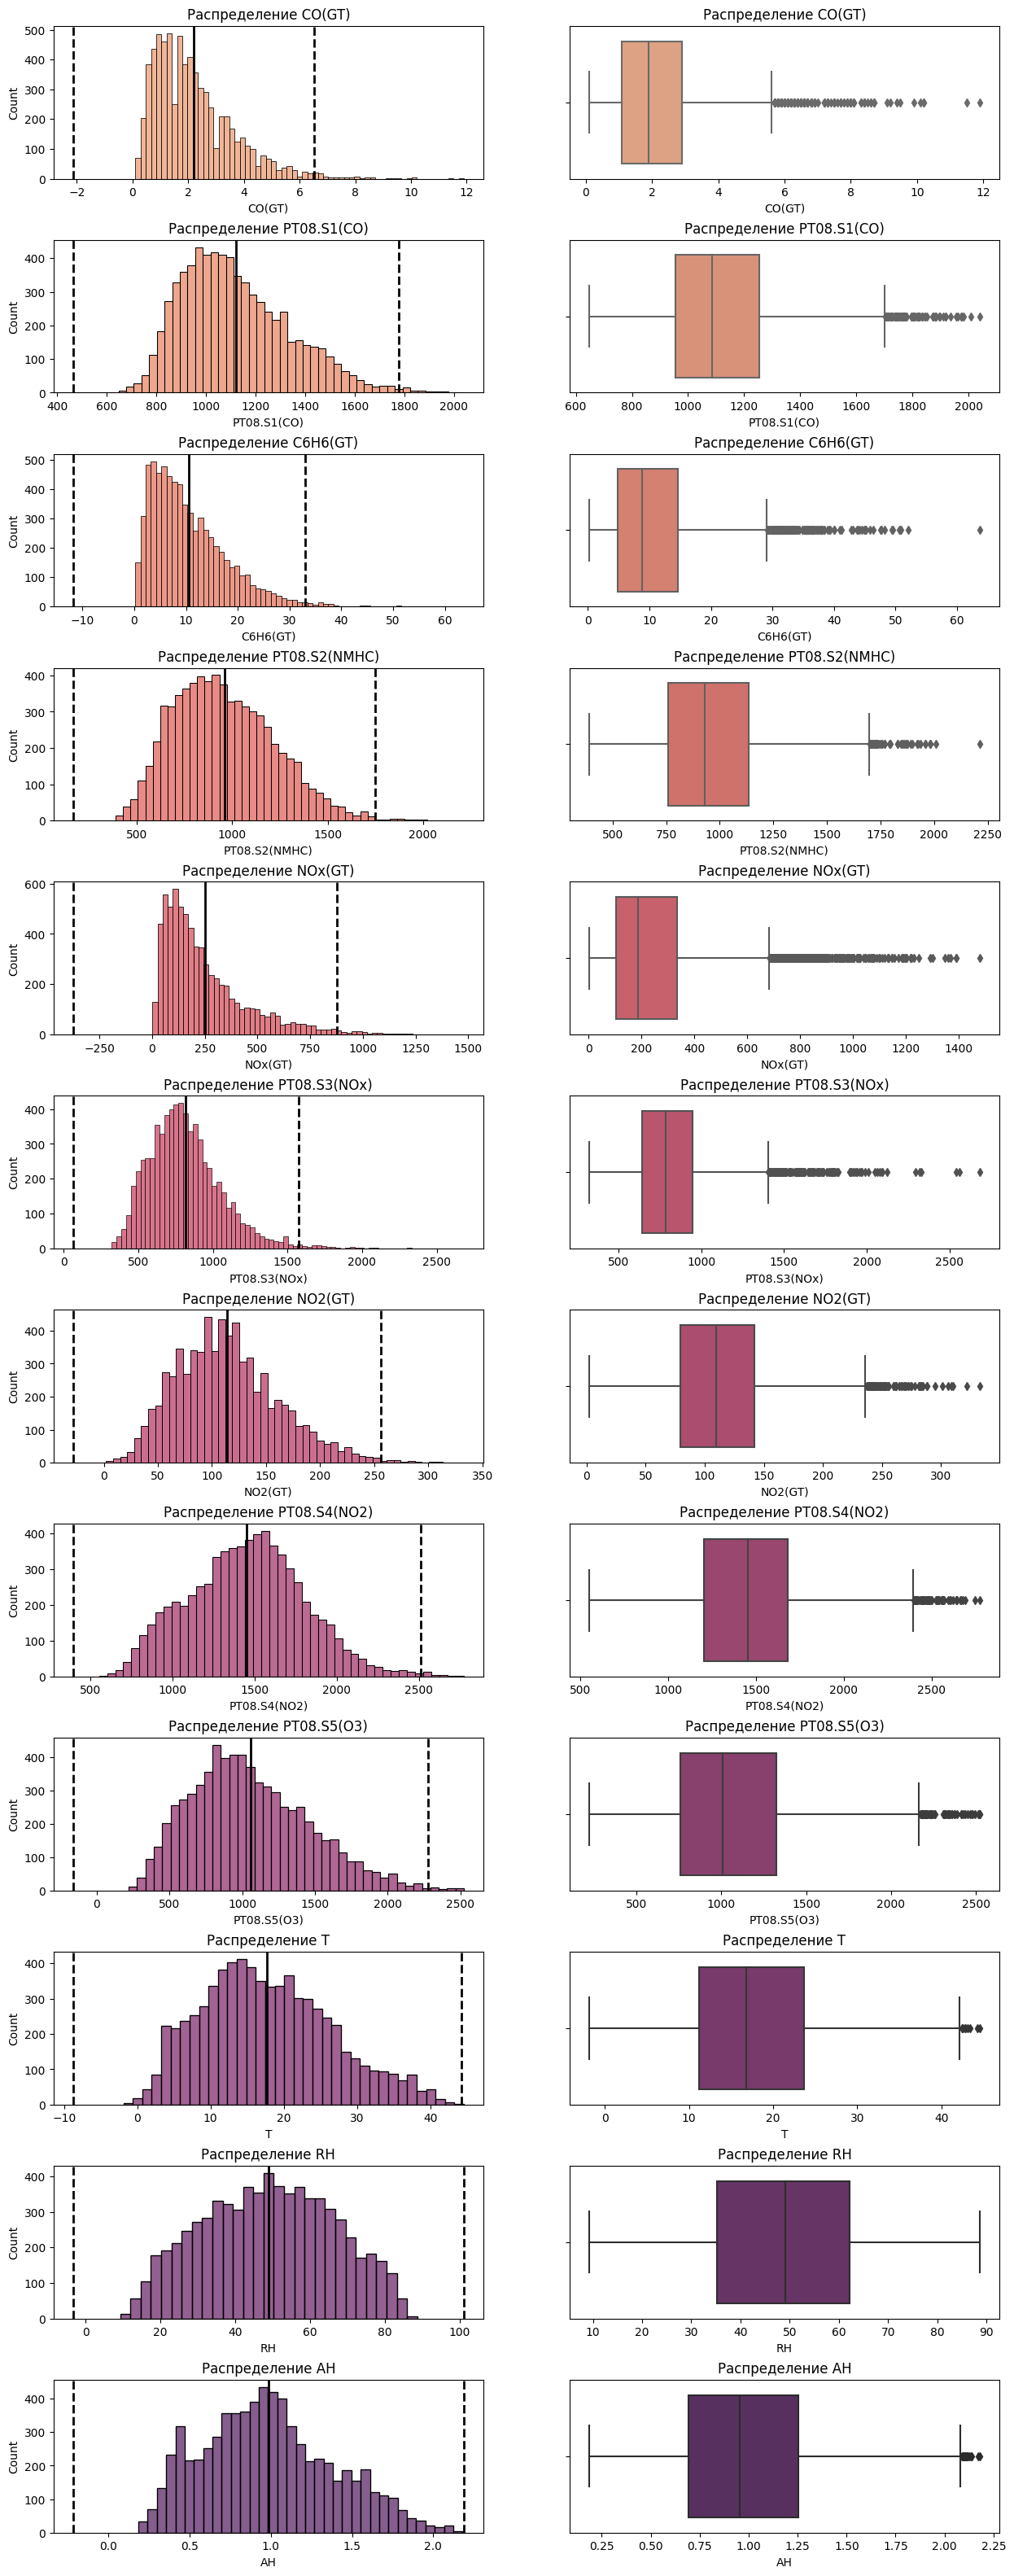

In [20]:
# Прописываем параметры для функции
colors = sns.color_palette('flare', n_colors=12)
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(15, 40))
plt.subplots_adjust(hspace=0.4)

columns_to_plot = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
                   'PT08.S5(O3)', 'T', 'RH', 'AH']

# используем цикл для формирования диаграмм
for i, column in enumerate(columns_to_plot):
    plot_distribution(df, column, colors[i], i, axes)

На основе полученных графиков можно сделать следующие выводы:

- **Распределение CO(GT)**: Данные кажутся право-скошенными, что указывает на наличие выбросов с более высокими значениями концентрации CO. Среднее значение выше медианы, что подтверждает правостороннюю асимметрию. На боксплоте видны выбросы, которые выходят за пределы верхнего уса.
- **Распределение PT08.S1(CO)**: Распределение похоже на нормальное, но с некоторой правосторонней асимметрией. На боксплоте также присутствуют выбросы, хотя их меньше, чем в случае с CO(GT).
- **Распределение C6H6(GT)**: Распределение явно право-скошенное, с множеством высоких выбросов, что видно на боксплоте. Это указывает на периоды с очень высоким уровнем концентрации бензола.
- **Распределение PT08.S2(NMHC)**: Распределение следует тенденции, аналогичной распределению CO и бензола, также имея правостороннюю асимметрию и выбросы.
- **Распределение NOx(GT)**: Это распределение также является право-скошенным с выбросами, указывая на периодически высокие концентрации оксидов азота.
- **Распределение PT08.S3(NOx)**: Это распределение менее скошено, чем предыдущие, и имеет меньше выбросов. Тем не менее, оно все еще выглядит право-скошенным.
- **Распределение NO2(GT)**: Распределение концентрации диоксида азота похоже на нормальное с небольшой правосторонней асимметрией. Выбросы присутствуют, но их количество меньше по сравнению с другими загрязняющими веществами.
- **Распределение PT08.S4(NO2)**: Это распределение выглядит довольно симметричным и приближается к нормальному, хотя на боксплоте видны некоторые выбросы.
- **Распределение PT08.S5(O3)**: Распределение кажется нормальным с некоторыми выбросами, которые видны на боксплоте.
- **Распределение T (Температура)**: Распределение температур показывает нормальное распределение без заметной асимметрии. На боксплоте выбросы отсутствуют, что указывает на относительно стабильные условия температуры.
- **Распределение RH (Относительная влажность)**: Распределение относительной влажности выглядит нормальным с легкой левосторонней асимметрией. Выбросы почти отсутствуют.
- **Распределение AH (Абсолютная влажность)**: Распределение похоже на нормальное с небольшой правосторонней асимметрией и наличием некоторых выбросов.

Для устранения выбросов будем использовать использовать метод z-отклонений, но так как некоторые распределения похожи на логнормальные, построим их в логарифмическом масштабе и исследуем их на выбросы.

In [21]:
def plot_log_distribution(df, column, ax, color, add_one=False):
    """
    Строит логарифмическое распределение для заданного столбца данных.

    :param df: DataFrame, содержащий данные.
    :param column: Название столбца для визуализации.
    :param ax: Объект matplotlib axis, на котором будет отображаться график.
    :param color: Цвет для графика.
    :param add_one: Логическое значение, указывающее, нужно ли добавлять 1 
                    к данным перед логарифмированием.
                    Это необходимо, если данные содержат нули.
    """
    # Логарифмирование данных с учетом флага add_one
    log_data = np.log(df[column] + 1) if add_one else np.log(df[column])
    
    # Построение гистограммы
    histplot = sns.histplot(log_data, ax=ax, color=color)
    
    # Добавление линий для среднего значения и +/- 3 стандартных отклонений
    ax.axvline(log_data.mean(), color='k', lw=2)
    ax.axvline(log_data.mean() + 3 * log_data.std(), color='k', ls='--', lw=2)
    ax.axvline(log_data.mean() - 3 * log_data.std(), color='k', ls='--', lw=2)
    
    # Задание заголовка графика
    ax.set_title(f'Логарифмическое распределение {column}')

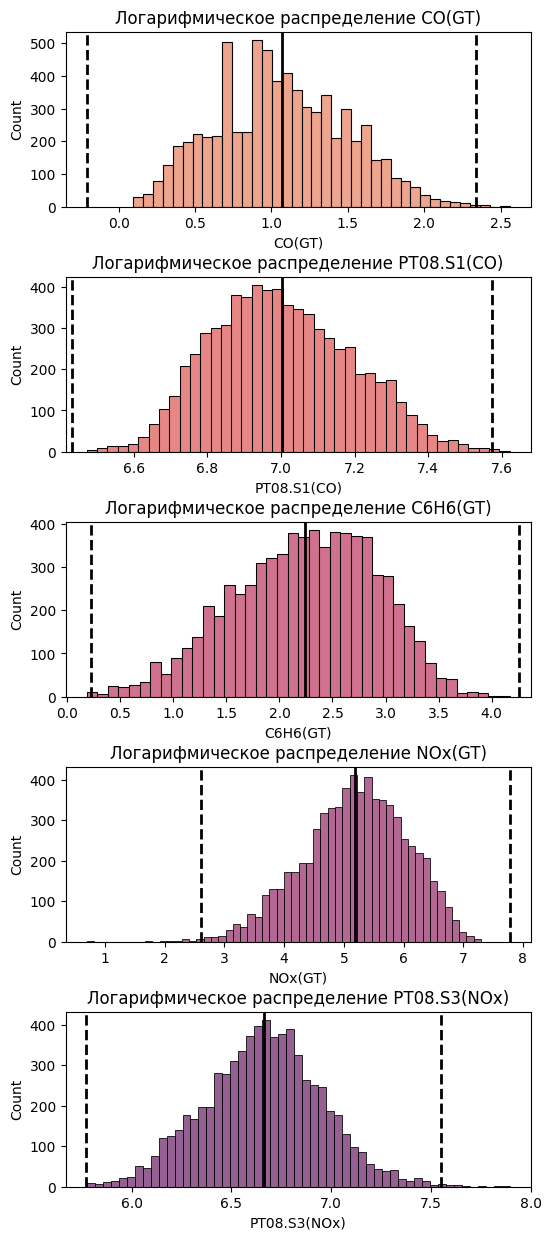

In [22]:
# Использование функции
colors = sns.color_palette('flare', n_colors=5)
fig, axes = plt.subplots(5, 1, figsize=(6, 15))
plt.subplots_adjust(hspace=0.4)

# Список столбцов и флаг, указывающий нужно ли добавлять 1
columns = [
    ('CO(GT)', True),
    ('PT08.S1(CO)', False),
    ('C6H6(GT)', True),
    ('NOx(GT)', False),
    ('PT08.S3(NOx)', False)
]

# Построение графиков
for i, (column, add_one) in enumerate(columns):
    plot_log_distribution(df, column, axes[i], colors[i], add_one)

На основе полученных графиков можно сделать следующие выводы:

- **Логарифмическое распределение CO(GT)**: Распределение концентрации угарного газа CO после логарифмирования показывает два пика, что может указывать на бимодальное распределение в исходных данных или на наличие двух разных групп данных. Линии среднего и стандартных отклонений расположены симметрично относительно самого высокого пика, что свидетельствует о нормальности логарифмического распределения.
- **Логарифмическое распределение PT08.S1(CO)**: После логарифмического преобразования данные отклика сенсора на CO показывают нормальное распределение без явной асимметрии. Среднее значение и стандартные отклонения указывают на хорошую централизацию данных вокруг среднего значения.
- **Логарифмическое распределение C6H6(GT)**: Распределение концентрации бензола также кажется нормальным после логарифмирования, однако здесь видна некоторая правосторонняя асимметрия. Наличие более длинного "хвоста" справа может указывать на выбросы с высокими значениями концентрации бензола.
- **Логарифмическое распределение NOx(GT)**: Данные о концентрации оксидов азота NOx после логарифмического преобразования образуют нормальное распределение. Это указывает на то, что логарифмическое преобразование помогает стабилизировать дисперсию и уменьшать эффект выбросов.
- **Логарифмическое распределение PT08.S3(NOx)**: Распределение отклика сенсора NOx показывает нормальное распределение с хорошей централизацией данных вокруг среднего значения и симметричным расположением стандартных отклонений.

Для удаления выбросов по методу z-отклонений напишем функцию, с возможностью использования логарифмического масштаба и послаблениями вправо и влево.

In [23]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """
    Определяет выбросы в данных и возвращает два набора по методу z-отклонений: 
    выбросы и очищенные данные.
    
    :param data: DataFrame, из которого необходимо удалить выбросы.
    :param feature: Имя столбца DataFrame, по которому определяются выбросы.
    :param log_scale: Если True, применяется логарифмическое преобразование к данным.
    :param left: Количество стандартных отклонений для нижней границы.
    :param right: Количество стандартных отклонений для верхней границы.
    :return: Два набора формата DataFrame, 
             первый с выбросами, второй с данными без выбросов.
    """
    
    # Применение логарифмического масштаба, если это указано
    if log_scale:
        # Применяем логарифмическое преобразование с добавлением 
        # 1, чтобы избежать логарифмирования нуля
        x = np.log(data[feature] + 1)
    else:
        # Используем данные без преобразований
        x = data[feature]
    
    # Рассчитываем среднее значение и стандартное отклонение
    mu = x.mean()
    sigma = x.std()
    
    # Определяем нижнюю и верхнюю границы для определения выбросов
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    
    # Определяем выбросы как те данные, которые выходят за пределы рассчитанных границ
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    
    # Очищенные данные — это те, которые находятся внутри границ
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]

    return outliers, cleaned


Очистим данные от выбросов, для некоторых признаков воспользуемся логарифмическим масштабом, послабления делать нет необходимости, поскольку небольшое количество данных попадает в категорию выбросов.

In [24]:
# Создаем список кортежей с названиями столбцов и флагом логарифмирования
features = [
    ('CO(GT)', True),
    ('PT08.S1(CO)', True),
    ('C6H6(GT)', True),
    ('PT08.S2(NMHC)', False),
    ('NOx(GT)', True),
    ('PT08.S3(NOx)', True),
    ('NO2(GT)', False),
    ('PT08.S4(NO2)', False),
    ('PT08.S5(O3)', False),
    ('T', False),
    ('RH', False),
    ('AH', False)
]

# Проходим по списку и выполняем функцию поиска выбросов для каждого столбца
for feature, log_scale in features:
    outliers, cleaned_data = outliers_z_score_mod(df, feature, log_scale=log_scale)
    print(f'Число выбросов для {feature}: {outliers.shape[0]}')

    # Обновляем DataFrame только для очищенных данных
    df = cleaned_data

print(' ')

# Выводим результирующее число записей после удаления всех выбросов
print(f'Результирующее число записей: {df.shape[0]}')

Число выбросов для CO(GT): 8
Число выбросов для PT08.S1(CO): 4
Число выбросов для C6H6(GT): 4
Число выбросов для PT08.S2(NMHC): 19
Число выбросов для NOx(GT): 18
Число выбросов для PT08.S3(NOx): 20
Число выбросов для NO2(GT): 35
Число выбросов для PT08.S4(NO2): 14
Число выбросов для PT08.S5(O3): 18
Число выбросов для T: 1
Число выбросов для RH: 0
Число выбросов для AH: 0
 
Результирующее число записей: 6800


Рассмотрим гистограммы распределений признаков после очистки.

In [25]:
def plot_hist_with_lines(df, column, ax, color, log_scale=False):
    """
    Построение гистограммы для заданного столбца данных с линиями среднего и стандартных отклонений.
    
    :param df: DataFrame, содержащий данные.
    :param column: Название столбца данных для построения гистограммы.
    :param ax: Ось, на которой будет построена гистограмма.
    :param color: Цвет для гистограммы.
    :param log_scale: Нужно ли применять логарифмическое преобразование к данным.
    """
    if log_scale:
        # Применяем логарифмическое преобразование, если требуется
        data_to_plot = np.log(df[column] + 1)
    else:
        data_to_plot = df[column]
        
    # Построение гистограммы
    sns.histplot(data_to_plot, ax=ax, color=color)
    
    # Расчет среднего и стандартного отклонения
    mean = data_to_plot.mean()
    std = data_to_plot.std()
    
    # Добавление линий среднего и +/- 3 стандартных отклонений
    ax.axvline(mean, color='k', lw=2)
    ax.axvline(mean + 3 * std, color='k', ls='--', lw=2)
    ax.axvline(mean - 3 * std, color='k', ls='--', lw=2)
    
    # Установка заголовка графика
    title = 'Логарифмическое распределение ' if log_scale else 'Распределение '
    ax.set_title(title + column)

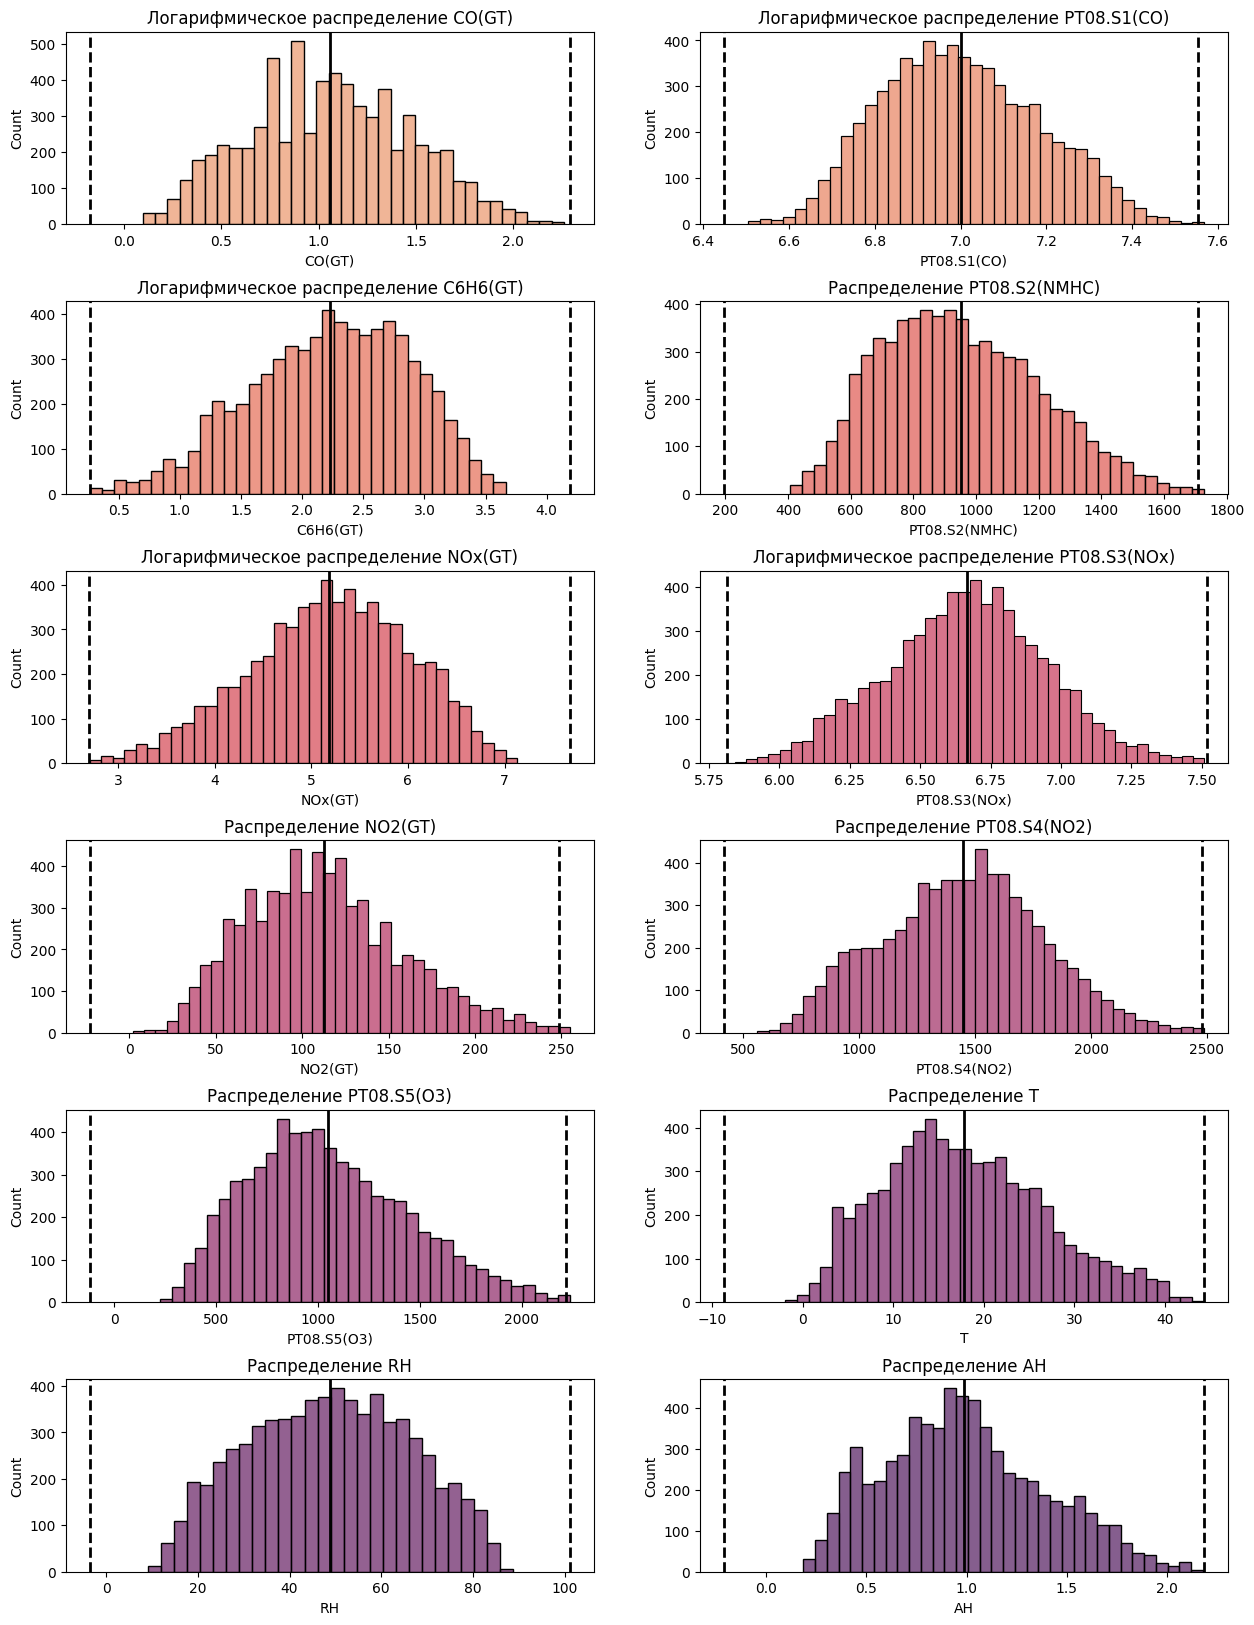

In [26]:
# Создание общей фигуры для всех графиков
colors = sns.color_palette('flare', n_colors=12)  # палитра цветов
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)

# Список столбцов для построения гистограмм и флаг логарифмирования
columns_to_plot = [
    ('CO(GT)', True),
    ('PT08.S1(CO)', True),
    ('C6H6(GT)', True),
    ('PT08.S2(NMHC)', False),
    ('NOx(GT)', True),
    ('PT08.S3(NOx)', True),
    ('NO2(GT)', False),
    ('PT08.S4(NO2)', False),
    ('PT08.S5(O3)', False),
    ('T', False),
    ('RH', False),
    ('AH', False)
]

# Построение гистограмм для каждого столбца
for i, (column, log_scale) in enumerate(columns_to_plot):
    row = i // 2  # Определение номера строки для графика
    col = i % 2   # Определение номера столбца для графика
    plot_hist_with_lines(df, column, axes[row][col], colors[i], log_scale)

plt.show()  # Отображаем графики

В целом, данные после очистки от выбросов показывают хорошо определённые распределения, которые могут быть лучше подходить для статистического анализа и моделирования. 

Запишем очищенные данные в файл для дальнейшей работы.

In [27]:
df.to_csv('../data/df_after_cleaning.csv')

В обработке данных было сделано:
- очистка данных от пропусков - NaN значений;
- поиск дубликатов;
- очистка данных от выбросов.

## **Анализ данных**

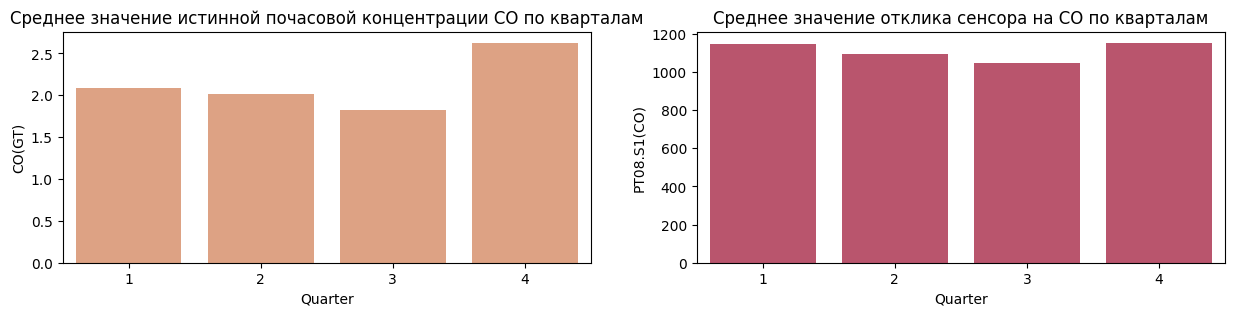

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание общей фигуры для отображения двух графиков с размером 15x3 дюймов
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

# Добавление в DataFrame 'df' нового столбца 'Quarter', который представляет собой номер квартала,
# извлеченного из столбца 'Date' (предполагается, что 'Date' уже преобразован в datetime)
df['Quarter'] = df['Date'].dt.quarter

# Построение столбчатой диаграммы для средней истинной почасовой концентрации CO по кварталам
# Отображение на первой оси (axes[0]), использование первого цвета из палитры (colors[0])
# Отключение показа стандартной ошибки (errorbar=None)
barplot = sns.barplot(
    data=df,
    x='Quarter',
    y='CO(GT)',
    ax=axes[0],
    color=colors[0],
    errorbar=None
)
# Задание заголовка для первого графика
barplot.set_title('Среднее значение истинной почасовой концентрации CO по кварталам')

# Построение столбчатой диаграммы для среднего значения отклика сенсора на CO по кварталам
# Отображение на второй оси (axes[1]), использование шестого цвета из палитры (colors[5])
# Аналогично отключение показа стандартной ошибки (errorbar=None)
barplot = sns.barplot(
    data=df,
    x='Quarter',
    y='PT08.S1(CO)',
    ax=axes[1],
    color=colors[5],
    errorbar=None
)
# Задание заголовка для второго графика
barplot.set_title('Среднее значение отклика сенсора на CO по кварталам')

# Отображение фигуры с графиками
plt.show()


**Истинная почасовая концентрация CO:**
- Средняя концентрация CO в четвертом квартале самая высокая и гораздо ниже концентрация в других кварталах.
- Третий квартал показывает наименьшее значение средней концентрации CO.

**Отклик сенсора на CO:**
- Средние значения отклика сенсора CO практически одинаковы для всех кварталов.
- Не наблюдается заметного сезонного изменения в отклике сенсора CO, что может указывать на стабильность работы сенсоров в течение года.

Возможно, что более высокие уровни в первом и четвертом кварталах связаны с сезонными факторами, такими как изменения в использовании отопления или изменения в интенсивности использвания транспорта. Меньшие значения в третьем квартале могут указывать на меньшее использование автомобилей, что часто встречается в летние месяцы.

### Графики попарных взаимодействий

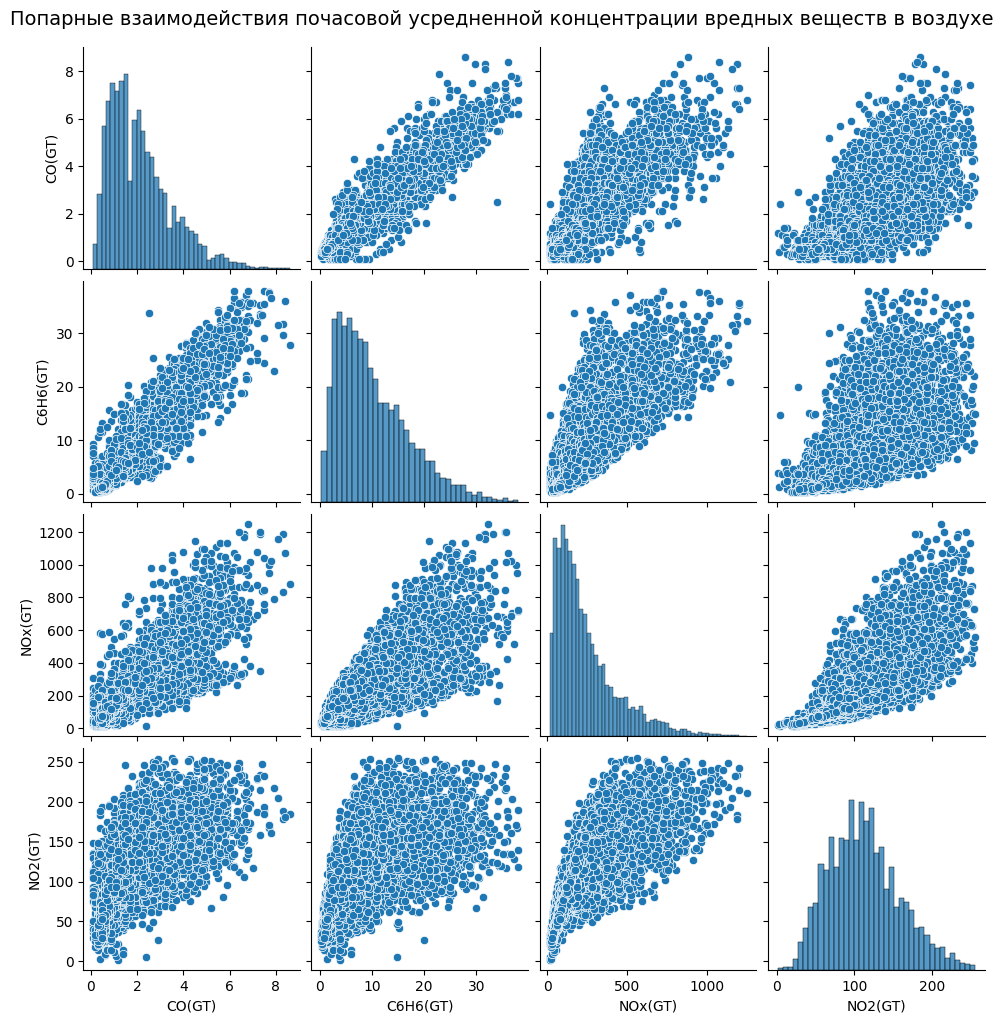

In [29]:
# Подготовка данных для графика попарных взаимодействий
df2 = df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

# Создание графика попарных взаимодействий
pairplot = sns.pairplot(df2)

# Добавление заголовка к графику
plt.suptitle('Попарные взаимодействия почасовой усредненной концентрации вредных веществ в воздухе', 
             size=14, y=1.02)

# Отображение графика
plt.show()

- Между CO(GT) и C6H6(GT) существует положительная корреляция, что видно по форме эллипса, указывающего на то, что с увеличением концентрации одного загрязнителя увеличивается и концентрация другого.
- Похожая положительная корреляция наблюдается между CO(GT) и NOx(GT), а также CO(GT) и NO2(GT).
- Концентрации NOx(GT) и C6H6(GT) также кажутся положительно коррелированными.
- Взаимосвязь между NOx(GT) и NO2(GT) является сильной и положительной, что указывает на возможную прямую связь между этими двумя загрязнителями в процессах их генерации или распределения.

Корреляции между различными загрязняющими веществами могут быть связаны с общими источниками, такими как автомобильные выхлопы или промышленные выбросы.

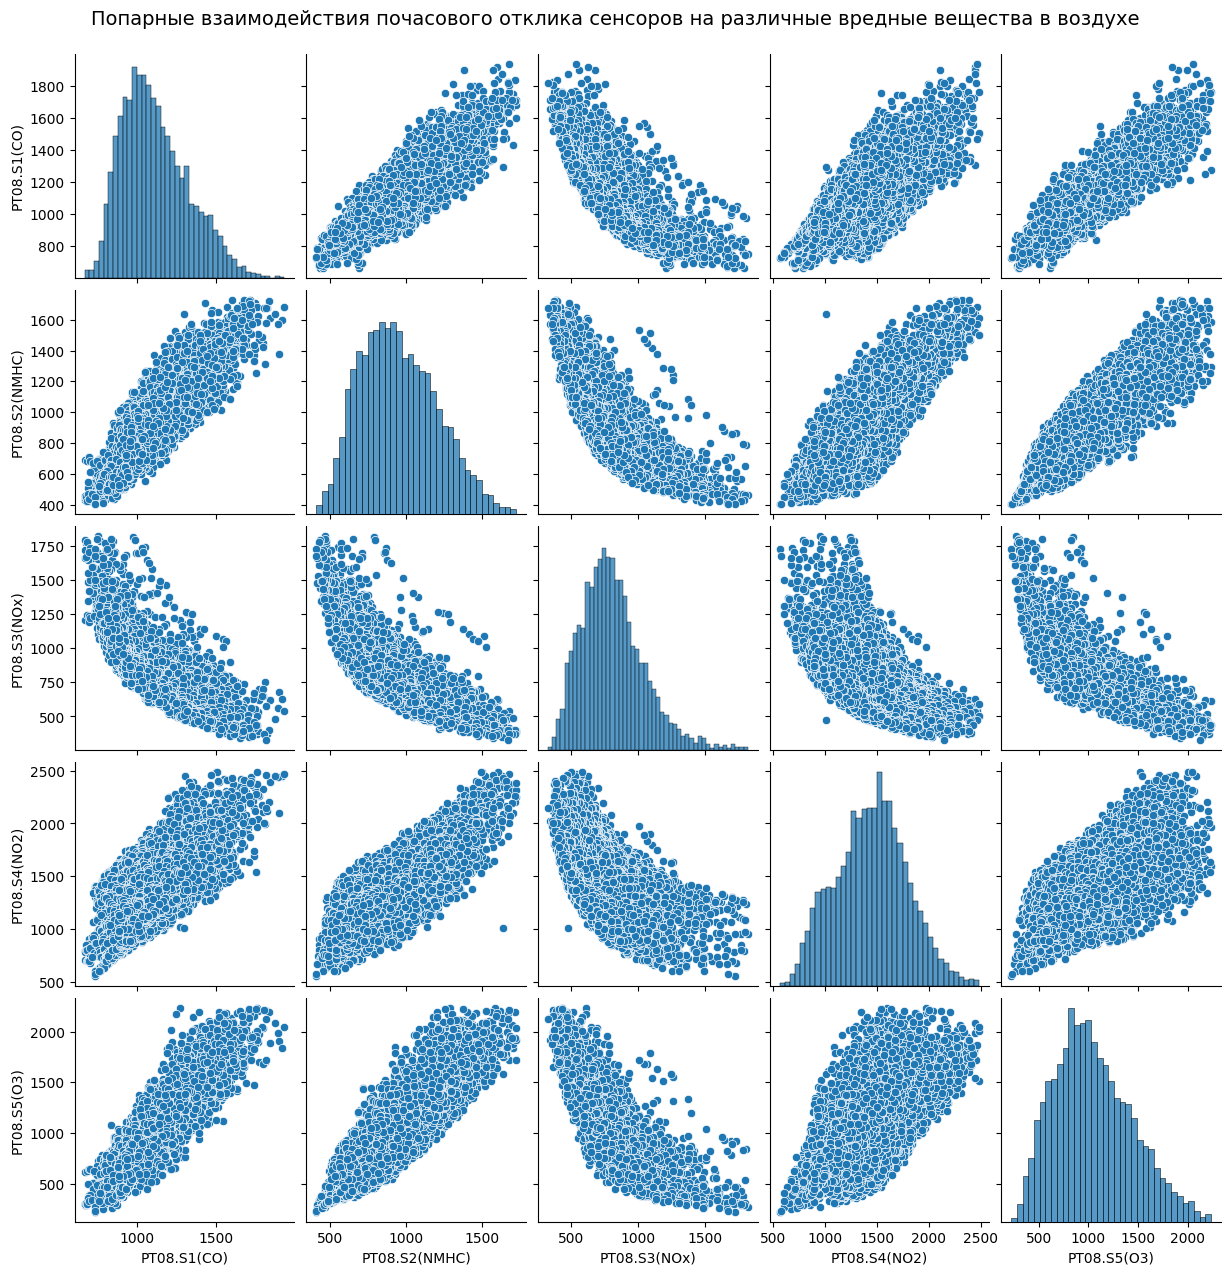

In [30]:
# Подготовка данных для графика попарных взаимодействий
# Здесь используется фиктивный датафрейм `df2`, т.к. `df` не определен в текущей среде
df2 = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

# Создание графика попарных взаимодействий
pairplot = sns.pairplot(df2)

# Добавление заголовка к графику
plt.suptitle('Попарные взаимодействия почасового отклика сенсоров на различные вредные вещества в воздухе', 
             size=14, y=1.02)

# Отображение графика
plt.show()

- Видны чёткие положительные корреляции между откликами некоторых сенсоров, таких как PT08.S1(CO), PT08.S2(NMHC), PT08.S4(NO2) и PT08.S5(O3) что может указывать на схожие паттерны изменения концентраций этих загрязнителей в воздухе или на схожесть источников этих веществ.
- Отклик PT08.S3(NOx) имеет обратную зависимость с остальными параметрами.

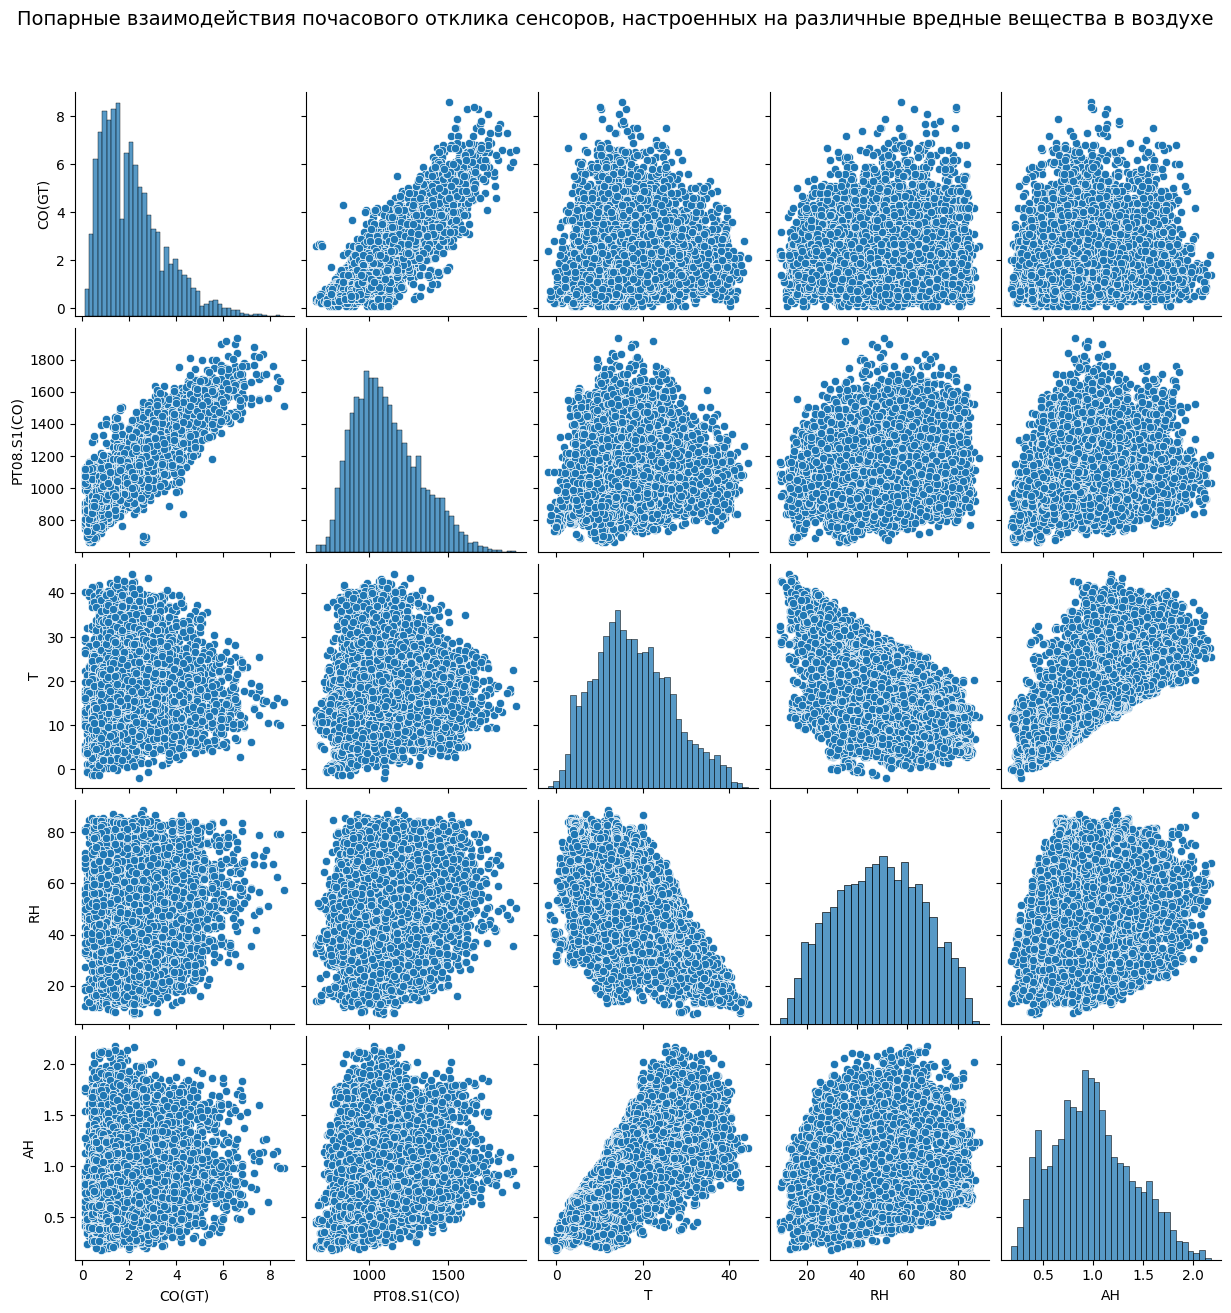

In [31]:
# Подготовка данных для графика попарных взаимодействий
df2 = df[['CO(GT)','PT08.S1(CO)', 'T', 'RH', 'AH']]

# Создание графика попарных взаимодействий
pairplot = sns.pairplot(df2)

# Добавление заголовка к графику
plt.suptitle('Попарные взаимодействия почасового отклика сенсоров, настроенных на различные вредные вещества в воздухе', 
             size=14, y=1.05)

# Отображение графика
plt.show()

- Сильная положительная корреляция между CO(GT) и PT08.S1(CO) понятна, так это связано с замером одного вещества.
- Температура (T) и относительная влажность (RH) показывают некоторую степень обратной корреляции, что может быть связано с физическими свойствами воздуха: при повышении температуры воздух может удерживать больше влаги, что приводит к снижению относительной влажности.
- Взаимосвязь между температурой и абсолютной влажностью (AH) не так очевидна. Хотя абсолютная влажность и увеличивается с температурой, распределение точек не показывает явной корреляции на графике.

In [32]:
# Группировка данных по месяцу и часу для расчета среднего значения концентрации CO
CO_hm = df.groupby(["Month_num", "Hour"]).agg({"CO(GT)": ['mean']})
CO_hm = CO_hm.reset_index()
# Переименование столбцов после группировки для удобства
CO_hm.columns = ["Month", "Hour", "CO(GT)"]

# Создание тепловой карты для визуализации средней концентрации CO по месяцам и часам
fig1 = go.Figure(
    data=go.Heatmap(
        z=CO_hm["CO(GT)"],  # Значения концентрации CO
        x=CO_hm["Hour"],  # Час замера как ось X
        y=CO_hm["Month"],  # Месяц замера как ось Y
    )
)

# Обновление макета графика, добавление заголовка и названий осей
fig1.update_layout(
    title="Концентрация CO по месяцам и часам",
    xaxis_title="Час замера",
    yaxis_title="Месяц",
    # Настройка отображения меток на оси Y
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),  # Значения меток от 1 до 12
        ticktext=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
                  'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']  # Названия месяцев
    )
)

# Отображение графика
fig1.show()

# Аналогичная операция для отклика сенсора на CO
CO_hm1 = df.groupby(["Month_num", "Hour"]).agg({"PT08.S1(CO)": ['mean']})
CO_hm1 = CO_hm1.reset_index()
CO_hm1.columns = ["Month", "Hour", "PT08.S1(CO)"]

# Создание тепловой карты для сенсора CO
fig2 = go.Figure(
    data=go.Heatmap(
        z=CO_hm1["PT08.S1(CO)"],  # Значения отклика сенсора на CO
        x=CO_hm1["Hour"],  # Час замера как ось X
        y=CO_hm1["Month"],  # Месяц замера как ось Y
    )
)

# Обновление макета графика для отклика сенсора на CO
fig2.update_layout(
    title="Средний отклик сенсора (номинально нацеленный на CO)",
    xaxis_title="Час замера",
    yaxis_title="Месяц",
    # Настройка отображения меток на оси Y, аналогично первому графику
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),  # Значения меток от 1 до 12
        ticktext=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
                  'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']  # Названия месяцев
    )
)

# Отображение графика для отклика сенсора на CO
fig2.show()

По обоим графикам можно сказать следующее:
- Высокие концентрации CO наблюдаются в определённое время суток, что может указывать на пиковые периоды выбросов, например, в часы пик на дорогах или в результате утреннего и вечернего отопления в холодные месяцы.
- Существует сезонная зависимость уровня CO: более высокие концентрации наблюдаются в холодные месяцы, что может быть связано с увеличением использования отопления и меньшим разбавлением загрязнителей из-за метеорологических условий, таких как температурные инверсии.
- В теплые месяцы уровни CO, как правило, ниже, что может быть связано с лучшей вентиляцией атмосферы и меньшим использованием отопления.
- Есть часы, когда концентрация CO ниже вне зависимости от месяца, что может указывать на ежедневные ритмы городской активности, включая движение транспорта и промышленное производство.

In [33]:
# Создание сводной таблицы для расчета средней концентрации CO по дням недели
CO_by_day = pd.pivot_table(df,
                           index=["Weekday"],  # Группировка данных по дню недели
                           values=["CO(GT)"],  # Выбор столбца для расчета среднего значения
                           aggfunc=[np.mean],  # Применение агрегирующей функции среднего
                           fill_value=0,  # Заполнение пропущенных значений нулями
                           margins=True)  # Добавление строки с общим средним значением

# Сброс индекса для преобразования мультиуровневого индекса в столбцы
CO_by_day = CO_by_day.reset_index()
# Переименование столбцов для удобства работы с данными
CO_by_day.columns = ["Weekday", "CO(GT)"]
# Добавление столбца с числовыми значениями дней недели для последующей сортировки
CO_by_day['Weekday_num'] = [5, 1, 6, 7, 4, 2, 3, 8]  # Например, 1 для понедельника, 2 для вторника и т.д.

# Сортировка данных по числовому представлению дней недели
CO_by_day = CO_by_day.sort_values(by='Weekday_num')

# Создание гистограммы для визуализации средней концентрации CO по дням недели
fig = px.histogram(CO_by_day, x="Weekday", y="CO(GT)")

# Обновление макета графика, добавление заголовка и названий осей
fig.update_layout(
    title="Концентрация CO по дням недели",
    xaxis_title="День недели",
    yaxis_title="Средняя концентрация CO"
)

# Отображение графика
fig.show()


По графику можно сказать следующее:
- Суточные колебания: Средняя концентрация CO варьируется в течение недели, достигая пика в пятницу и снижаясь к воскресенью.
- Выходные дни: Существенное снижение концентрации CO наблюдается в выходные дни, особенно в воскресенье, что может быть связано с уменьшением трафика транспорта и промышленной активности.
- Рабочие дни: Во вторник, среду и четверг концентрация CO держится на сравнительно стабильном уровне, что может соответствовать рабочим дням с регулярными выбросами от транспорта и производства.
- Пик в конце рабочей недели: Наибольшая концентрация CO в пятницу может быть обусловлена недельными циклами активности населения и промышленности.

### Матрица корреляции

/var/folders/01/wgcp1v9n5zjdx14pvmwxt4mc0000gn/T/ipykernel_7058/4020717595.py:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



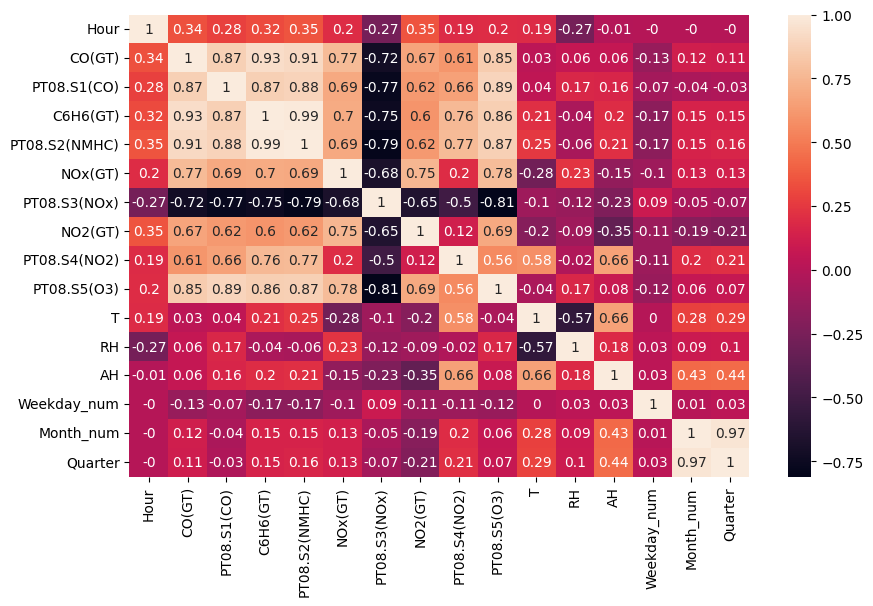

In [34]:
# Создаем копию исходного DataFrame для проведения анализа корреляций
df_corr = df.copy()

# Устанавливаем размер фигуры для тепловой карты
fig = plt.figure(figsize=(10, 6))

# Перебираем каждый столбец в DataFrame
for i in df_corr:
    # Удаляем столбцы с нечисловыми данными (тип 'object'), так как корреляция Пирсона
    # применима только к числовым столбцам
    if df[i].dtype == 'object':
        df_corr.drop(i, axis=1, inplace=True)

# Вычисляем корреляционную матрицу с округлением до двух знаков после запятой
corr = round(df_corr.corr(), 2)

# Создаем тепловую карту для визуализации корреляционной матрицы
# `annot=True` позволяет отобразить числовые значения внутри ячеек карты
sns.heatmap(corr, annot=True)

# Отображаем график
plt.show()

Основные выводы, которые можно сделать на основе этой матрицы:

**Сильная корреляция:**
- Почти все сенсоры, измеряющие концентрации загрязняющих веществ (CO, C6H6, NMHC, NOx, NO2, O3), показывают сильную взаимную корреляцию. Это означает, что уровни измеряемых ими загрязнителей, как правило, увеличиваются или уменьшаются вместе.
- В частности, есть очень высокие коэффициенты корреляции между PT08.S1(CO) и C6H6(GT), PT08.S2(NMHC), что указывает на то, что уровни этих загрязнителей часто изменяются синхронно.

**Отрицательная корреляция:**
- Некоторые пары показывают отрицательную корреляцию, например, PT08.S3(NOx) имеет отрицательную корреляцию с другими сенсорами (PT08.S1(CO), PT08.S2(NMHC), PT08.S4(NO2) и PT08.S5(O3)), что может указывать на то, что когда уровни NOx увеличиваются, уровни других загрязнителей могут уменьшаться или наоборот.

**Слабая или нулевая корреляция:**
- Метеорологические переменные (температура T, относительная влажность RH, абсолютная влажность AH) показывают слабую или очень слабую корреляцию с большинством сенсоров загрязнителей, что говорит о том, что они могут оказывать ограниченное влияние на уровни измеряемых загрязнений или же эти взаимосвязи не являются линейными.
- Временные переменные, такие как Hour, Weekday_num, Month_num и Quarter, в большинстве случаев также показывают слабую корреляцию с уровнями загрязнителей, что может указывать на сложность связи между временем и уровнями загрязнения.

### Изучение данных на предмет превышения ПДК

В качестве меры, ограничивающей содержание загрязняющих веществ в окружающей природной среде, принята предельно допустимая концентрация (ПДК). Нас интересуют два показателя:
- Предельно допустимая среднесуточная концентрация вредного (загрязняющего) вещества в воздухе населенных мест (ПДКсс);
- Предельно допустимая максимальная разовая концентрация вредного (загрязняющего) вещества в воздухе населенных мест (ПДКмр).

Для Оксида углерода (CO) предельно допустимая среднесуточная концентрация - 3 мг/м3 и предельно допустимая максимальная разовая концентрация - 5 мг/м3.

In [35]:
# Группировка данных по дате с расчетом среднего значения концентрации CO для каждой даты
df2 = df.groupby(["Date"]).agg({"CO(GT)": ['mean']})
# Сброс индекса для превращения индексированных групп в столбцы
df2 = df2.reset_index()
# Переименование столбцов для простоты доступа
df2.columns = ["Date", "CO(GT)"]

# Подсчет количества уникальных дней, когда средняя концентрация CO превысила пороговое значение 3 мг/м^3
pdk = df2['CO(GT)'][df2['CO(GT)'] > 3].nunique()

# Вывод количества дней, когда среднесуточная концентрация CO превысила предельно допустимое значение
print(f'Предельная допустимая среднесуточная концентрация CO превышена в течение {pdk} дней в году')

Предельная допустимая среднесуточная концентрация CO превышена в течение 39 дней в году


## **Выводы**

Выполнено:
- изучение полученной информации уровню веществ в воздухе в течении года
- предобработка и очистка данных
- анализ различных аспектов данных о загрязнении воздуха, включая концентрацию угарного газа (CO) и других веществ, а также отклики различных сенсоров. 

Вот общие выводы по проведенному анализу:

1. **Динамика загрязнения по времени**: Наблюдается сезонная и суточная динамика в концентрациях CO и других загрязняющих веществ. В частности, более высокие уровни CO фиксировались в холодные месяцы, что может быть связано с увеличенным использованием отопительных систем и автомобильного транспорта. 

2. **Корреляция между показателями**: Из анализа корреляции было выявлено, что различные сенсоры показывают сильную взаимную корреляцию в измерениях разных загрязнителей, что указывает на их общее происхождение или схожие реакции в атмосфере. Отклики некоторых сенсоров также показали отрицательную корреляцию, что может отражать более сложные взаимодействия между загрязнителями.

3. **Влияние метеорологических условий**: Метеорологические факторы, такие как температура, относительная и абсолютная влажность, продемонстрировали слабую корреляцию с уровнями загрязнителей, что говорит о том, что взаимосвязи между этими переменными могут быть нелинейными или медиативными.

4. **Превышение пороговых значений**: Было выявлено, что среднесуточные концентрации CO превышают установленные пределы в определенное количество дней в году. Это указывает на необходимость предпринятия мер по улучшению качества воздуха.

5. **Визуализация данных**: Графики и тепловые карты использовались для наглядного представления данных, позволяя быстро выявить тенденции и выбросы в распределении загрязнителей по времени и взаимодействию между разными типами загрязняющих веществ.